# Response to hyperpolarising square current injection

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
from neuron import h, gui, load_mechanisms   
from nrnutils import Section, Mechanism      
import Model

In [4]:
# It is not possible to consistently get the path of a Jupyter notebook. But this may work most of the time.
# If not, paste the absolute path to the folder containing the mod files (not the compiled files)
import os
current_path = os.getcwd()
load_mechanisms(os.path.join(current_path, "mod"))

True

In [5]:
model = Model.without_ih()

In [6]:
# Some special place
middle_Bouton = model.boutons[model.axNum//2]

# Checking topology
s = h.Shape()
s.show(False)
s.color(2, sec=middle_Bouton)     # color middle_Bouton red
# h.topology()

0.0

In [7]:
pre_interval = 1000.
sim_interval = 1000.

In [8]:
stim = h.IClamp(middle_Bouton(0.5))
stim.delay=pre_interval + 95    # stimulus delay in ms
stim.dur=200                   # stimulus duration in ms
stim.amp=-0.1                 # stimulus amplitude in nA

In [9]:
# Record voltage and time
v_vec = h.Vector()          # Membrane potential vector [mV]
t_vec = h.Vector()          # Time stamp vector [ms]
v_vec.record(middle_Bouton(0.5)._ref_v)
t_vec.record(h._ref_t) 

Vector[4]

In [10]:
h.tstop = pre_interval + sim_interval
h.run()
t_vec.add(-pre_interval) # Discard the first 1000ms to equilibrate the membrane potential

Vector[4]

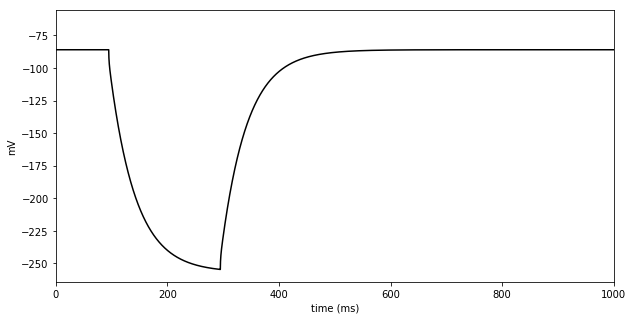

In [11]:
fig = plt.figure() 

plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t_vec, v_vec, color='black')


plt.xlim((0,sim_interval))   

plt.show()
